# Εργασία 8 - ANN

Ευθυμιάδης Κωνσταντίνος<br>
ΑΕΜ: 240

## Εισαγωγή Βιβλιοθηκών

In [1]:
import numpy as np
import os
import PIL
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split

## Πρώτο και Δεύτερο Ερώτημα

In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

## Τρίτο Ερώτημα

### Αποθήκευση όλων των ονομάτων των υποφακέλων, οι οποίοι αποτελούν και τα ονόματα από τις ράτσες των σκύλων

In [3]:
x_data= []
y_labels= []

if not os.path.exists("dataset"):
  print("ERROR: The dataset folder does not exist")
else:
  subfolders= []
  for temp in os.listdir("dataset"):
    subDirPath= os.path.join("dataset", temp)
    if os.path.isdir(subDirPath):
      subfolders.append(temp)

  subfolders= sorted(subfolders)
  id_of_breeds= {breed: id for id, breed in enumerate(subfolders)}
  print(id_of_breeds)

{'Beagle': 0, 'Boxer': 1, 'Bulldog': 2, 'Dachshund': 3, 'German_Shepherd': 4, 'Golden_Retriever': 5, 'Labrador_Retriever': 6, 'Poodle': 7, 'Rottweiler': 8, 'Yorkshire_Terrier': 9}


### Δημιουργία των inputs και targets

In [4]:
image_size = (64, 64)
inputs= []
targets= []

for subfolder_name in subfolders:
  path_of_subfolder= os.path.join("dataset", subfolder_name)

  for image_name in os.listdir(path_of_subfolder):
    path_of_image= os.path.join(path_of_subfolder, image_name)

    image= PIL.Image.open(path_of_image).convert("RGB")
    image= image.resize(image_size)

    inputs.append(np.array(image))
    targets.append(id_of_breeds[subfolder_name])


inputs= np.array(inputs)
targets= np.array(targets)

### Κανονικοποίηση των inputs

In [5]:
inputs = inputs.astype('float32') / 255.0

### Δημιουργία one-hot-encoding

In [6]:
number_of_classes= len(subfolders)

targets= np.eye(number_of_classes)[targets]

### Προβολή shapes

In [7]:
inputs.shape, targets.shape

((967, 64, 64, 3), (967, 10))

In [8]:
inputs[0]

array([[[0.41568628, 0.4862745 , 0.5019608 ],
        [0.41568628, 0.4862745 , 0.5019608 ],
        [0.41568628, 0.4862745 , 0.5019608 ],
        ...,
        [0.45882353, 0.5372549 , 0.53333336],
        [0.4627451 , 0.5411765 , 0.5411765 ],
        [0.4627451 , 0.5411765 , 0.5372549 ]],

       [[0.41568628, 0.4862745 , 0.5019608 ],
        [0.41568628, 0.4862745 , 0.5019608 ],
        [0.41568628, 0.4862745 , 0.5019608 ],
        ...,
        [0.43529412, 0.5137255 , 0.5176471 ],
        [0.4509804 , 0.5294118 , 0.5294118 ],
        [0.45882353, 0.5372549 , 0.5411765 ]],

       [[0.43137255, 0.5019608 , 0.5176471 ],
        [0.43137255, 0.5019608 , 0.5176471 ],
        [0.43137255, 0.5019608 , 0.5176471 ],
        ...,
        [0.41960785, 0.49803922, 0.5019608 ],
        [0.4117647 , 0.49019608, 0.49411765],
        [0.4117647 , 0.49019608, 0.49411765]],

       ...,

       [[0.31764707, 0.37254903, 0.38431373],
        [0.31764707, 0.37254903, 0.38431373],
        [0.30588236, 0

## Τέταρτο Ερώτημα

### Χωρισμός Δεδομένων

In [9]:
seed= 0
test_size= 0.3

x_train, x_test, y_train, y_test= train_test_split(
    inputs, targets, test_size= test_size, random_state= seed, stratify= targets
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676, 10), (291, 64, 64, 3), (291, 10))

### Δημιουργία MLP

In [10]:
input_size = x_train.shape[1:]
output_size = y_train.shape[1]

mpl_model= tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')
mpl_model.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,590,794 (6.07 MB)

 Trainable params: 1,590,794 (6.07 MB)

 Non-trainable params: 0 (0.00 B)

Η είσοδος δέχεται εικόνες (64, 64, 3). Έπειτα, χρησιμοποιείται η Flatten ώστε να μετατρέψει την παραπάνω τρισδιάστατη είσοδο σε ένα διάνυσμα 64 x 64 x 3= 12288 στοιχείων.<br>
Υπάρχουν δύο ενδιάμεσα επίπεδα με 128 νευρώνες το κάθε ένα. Και τα δύο χρησιμοποιούν την activation συνάρτηση: ReLU.<br>
Το output layer έχει μέγεθος ίσο με το output_size (το πλήθος των ρατσών των σκύλων που υπάρχουν στο dataset). Η activation συνάρτηση που χρησιμοποιείται είναι η softmax, η οποία μετατρέπει τις εξόδους σε πιθανότητες που αθροίζουν στο 1.<br><br>
Οι παράμετροι στο πρώτο επίπεδο είναι ιση με 12288 x 128 +128= 1572992. Η πρόσθεση του 128 είναι λόγω το bias.<br><br>
Το δεύτερο επίπεδο δέχεται τις εξόδους του πρώτου, (δηλαδή 128 στοιχεία). Άρα οι παράμετροι είναι 128 x 128+128= 16512<br><br>
Το τελικό layer δέχεται τις εξόδους του προηγούμενου (δηλαδή 128 στοιχεία). Επειδή το πλήθος των units είναι ίσο με το πλήθος των ρατσών (που στην προκυμένη περίπτωση είναι ίσο με 10), το πλήθος των παραμέτρων είναι ίσο με 128 x 10+10= 1290

## Πέμπτο Ερώτημα

### Εκπαίδευση Μοντέλου

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
mpl_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

batch_size= 32
epochs= 30

history = mpl_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.1067 - loss: 4.2671 - val_accuracy: 0.1615 - val_loss: 2.3986
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1780 - loss: 2.3274 - val_accuracy: 0.2165 - val_loss: 2.3202
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2946 - loss: 2.0918 - val_accuracy: 0.2612 - val_loss: 2.0797
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3352 - loss: 1.9051 - val_accuracy: 0.3162 - val_loss: 1.8272
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4106 - loss: 1.6266 - val_accuracy: 0.4433 - val_loss: 1.6360
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5432 - loss: 1.3987 - val_accuracy: 0.5533 - val_loss: 1.4488
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5609 - loss: 1.3413 - val_accuracy: 0.6529 - val_loss: 1.2646
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7786 - loss: 0.9998 - val_accuracy: 0.6976 - v

## Έκτο Ερώτημα

### Εμφάνιση loss history και accuracy history για τα δεδομένα train, test.

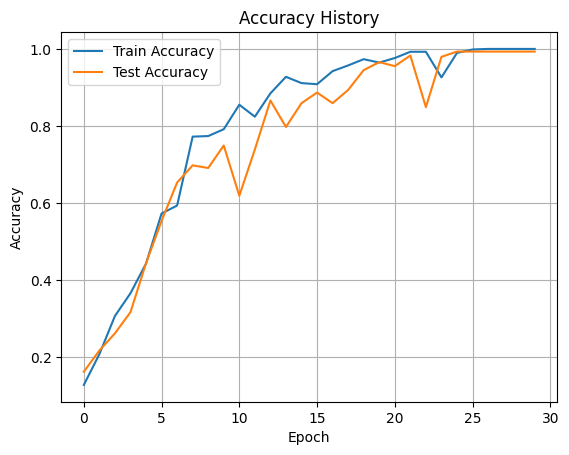

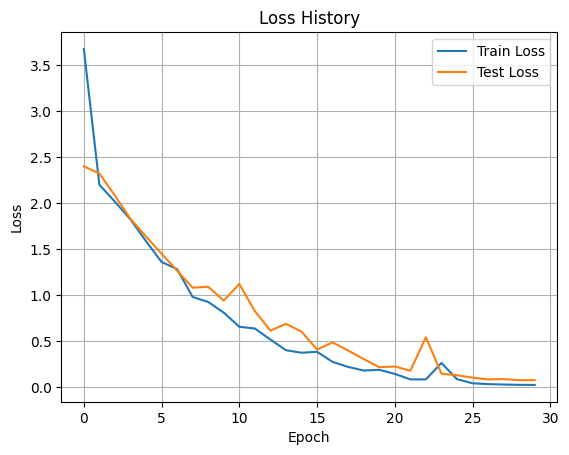

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Έβδομο Ερώτημα

### Δημιουργία CNN

In [13]:
cnn_model= tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name="CNN")
cnn_model.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,444,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,456,298 (13.18 MB)

 Trainable params: 3,456,298 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

Η είσοδος δέχεται εικόνες (64, 64, 3).<br>
Έπειτα, εφαρμόζεται το πρώτο layer συνέλιξης με 32 filters. Κάθε φίλτρο έχει kernel size ίσο με 3 x 3 (δηλαδή δεν κοιτάει όλη την εικόνα ταυτόχρονα, αλλά μια περιοχή 3 x 3. Κινείται από αριστερά προς τα δεξιά και από πάνω προς τα κάτω). Επιπλέον, έχει οριστεί strides= 2, ώστε το φίλτρο να μετακινείται ανά 2 pixels κάθε φορά. Με αυτό τον τρόπο πραγματοποιείται μείωση των διαστάσεων της εικόνας. Ως activation συνάρτηση χρησιμοποιείται η ReLU. <br>
Στο επόμενο layer, πραγματοποιείται dropout με ρυθμό 0.2. Πρακικά, κατά την διάρκεια της εκπαίδευσης, το επίπεδο απενεργοποιεί τυχαία το 20% των νευρώνων. Με αυτόν τον τρόπο επιτυγχάνεται η μείωση του overfitting, αφού το μοντέλο αναγκάζεται να μην εξαρτάται από συγκεκριμένους νευρώνες.<br>
Στο επόμενο layer, εφαρμόζεται ξανά συνέλιξη, με το ίδιο πλήθος filters και kernel_size, καθώς και η activation συνάρτηση παραμένει η ίδια (ReLU). Το μόνο διαφορετικό με το πρώτο layer είναι ότι τώρα το strides είναι ίσο με 1, οπότε και διατηρούνται οι διαστάσεις των χαρακτηριστικών.<br>
Στο επόμενο layer πραγματοποιείται flatten, μετατρέπονται τα χαρακτηριστικά σε ένα μονοδιάστατο διάνυσμα.<br>
Το επόμενο layer, αποτελείται από 128 νευρώνες, με activation συνάρτηση την ReLU.<br>
Το τελικό layer, αποτελείται από αριθμό νευρώνων ίσο με το πλήθος των κλάσεων (στην συγκεκριμένη κατάσταση είναι 10 ράτσες σκυλιών). Χρησιμοποιείται η activation συνάρτηση softmax, η οποία δημιουργεί μια κατανομή πιθανότητας.

### Εκπαίδευση CNN

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - accuracy: 0.1891 - loss: 2.3023 - val_accuracy: 0.5567 - val_loss: 2.0081
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.5270 - loss: 1.6591 - val_accuracy: 0.6804 - val_loss: 1.0180
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.8391 - loss: 0.6144 - val_accuracy: 0.9278 - val_loss: 0.2934
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.9712 - loss: 0.1631 - val_accuracy: 0.9794 - val_loss: 0.0978
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.9986 - loss: 0.0268 - val_accuracy: 0.9931 - val_loss: 0.0509
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.9931 - val_loss: 0.0564
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.9931 - val_loss: 0.0570
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.

### Εμφάνιση loss history και accuracy history για τα δεδομένα train, test.

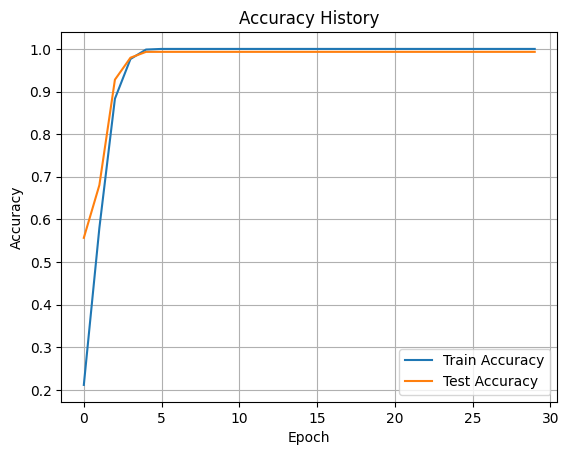

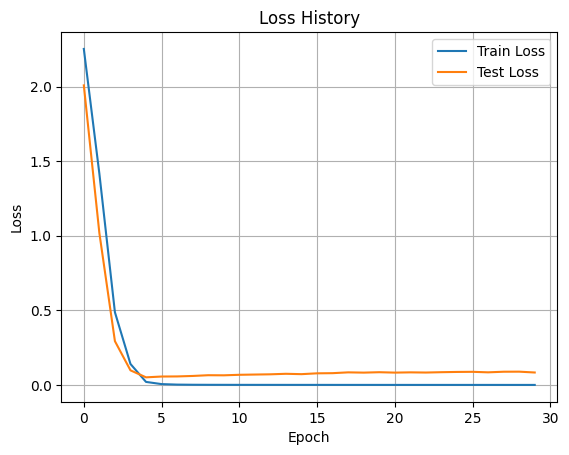

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Το CNN μοντέλο είναι καλύτερο έναντι του MLP.<br>
Αντίθετα με το MLP, το οποίο αντιμετωπίζει κάθε εικόνα ως ένα απλό διάνυσμα με ανεξάρτητα τα pixels μεταξύ τους, το CNN χρησιμοποιεί την συνέλιξη με αποτέλεσμα η εικόνα να αναλύεται σε μικρές ομάδες γειτονικών pixels. Με αυτόν τον τρόπο, το μοντέλο μπορεί να εντοπίζει διάφορα σχήματα. Επιπλέον, με την χρήση του Dropout, το μοντέλο μειώνει το overfitting αφού δεν βασίζεται σε κάποιο μονοπάτι νευρώνων, κάτι το οποίο μπορεί να συμβεί στην περίπτωση του MLP.<br>
Σύμφωνα και με τα σχεδιαγράμματα, το CNN πετυχαίνει σταθερότερη μείωση του σφάλματος στο test set, ενώ επιπλέον από τα πρώτα κι όλας epochs πετυχαίνει υψηλή ακρίβεια. Αυτό δείχνει ότι το CNN αναγνωρίζει γρηγορότερα τα σωστά χαρακτηριστικα σε σχέση με το MLP. Όλα τα παραπάνω, φανερώνουν ότι η αρχιτεκτονική του CNN είναι καλύτερη για ανάλυση εικόνων

## Όγδοο Ερώτημα

Όπως αναφέρθηκε και προηγουμένως, το CNN πετυχαίνει πολύ μεγάλη ακρίβεια από τα πρώτα κι όλας epochs. Δεν χρειάζεται βελτίωση ως προς την ικανότητά του να προβλέπει σωστά, αλλά πρέπει να βελτιωθεί ο χρόνος που απιτείται για την εκπαίδευση του μοντέλου.<br>
Με βάση και τα σχεδιαγράμματα, μπορούμε να χρησιμοποιήσουμε έναν αριθμό epochs ίσο με 10. Επιπλέον, μπορούμε να μειώσουμε το πλήθος των νευρώνων, κάνοντας το μοντέλο πιο γρήγορο στην εκτέλεση, καθώς και να χρησιμοποιήσουμε λιγότερα φίλτρα στα συνελικτικά επίπεδα.

In [16]:
improved_cnn_model= tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name="improved_CNN")
improved_cnn_model.summary()

Model: "improved_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │     1,722,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733,226 (6.61 MB)

 Trainable params: 1,733,226 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

### Εκπαίδευση μοντέλου

In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
improved_cnn_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

epochs= 10

history = improved_cnn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 162ms/step - accuracy: 0.1266 - loss: 2.4133 - val_accuracy: 0.4570 - val_loss: 2.1573
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step - accuracy: 0.3485 - loss: 2.0027 - val_accuracy: 0.5498 - val_loss: 1.4709
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.6481 - loss: 1.2708 - val_accuracy: 0.7801 - val_loss: 0.8383
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8587 - loss: 0.5562 - val_accuracy: 0.9278 - val_loss: 0.3299
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9689 - loss: 0.1752 - val_accuracy: 0.9656 - val_loss: 0.1594
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.9996 - loss: 0.0463 - val_accuracy: 0.9828 - val_loss: 0.1036
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 1.0000 - loss: 0.0157 - val_accuracy: 0.9931 - val_loss: 0.0910
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.

### Εμφάνιση loss history και accuracy history για τα δεδομένα train, test.

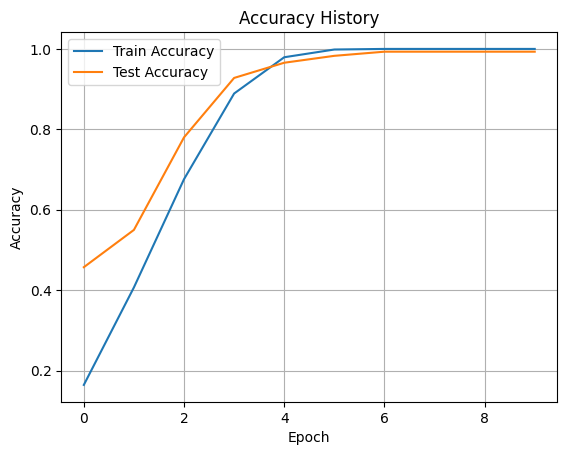

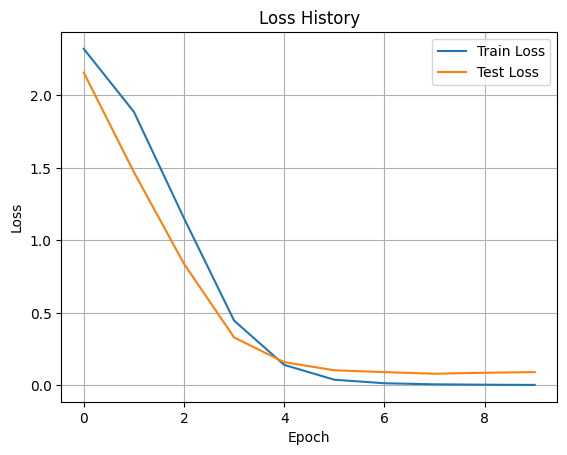

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Παρατηρούμε ότι η ακρίβεια παραμένει πάρα πολύ ηψηλά (για το train set ίση με 1.0 και για το test set περίπου ίση με 0.99), φανερώνοντας ότι η απλοποίηση της αρχιτεκτονικής δεν επηρέασε καθόλου την ικανότητα του μοντέλου στην πρόβλεψη. Επομένως, το CNN βελτιώθηκε, αφού πετυχαίνει τα ίδια άριστα αποτελέσματα με το προηγούμενο CNN, καταναλώνοντας όμως λιγότερο χρόνο (λιγότερα epochs) και λιγότερους υπολογιστικούς πόρους (λιγότεροι νευρώνες).